# Tiếp cận R như ngôn ngữ lập trình

## Bài 2: Ma trận - cấu trúc dữ liệu 2 chiều

**Bs. Lê Ngọc Khả Nhi**



## Bản chất của matrix và cách tạo matrix thủ công

Trong bài 1 lần trước, chúng ta đã làm quen với Vector, cấu trúc dữ liệu 1 chiều và cơ bản trong R. Matrix (tiếng Việt: ma trận) là một cấu trúc dữ liệu cơ bản khác trong R cho phép lưu trữ và trình bày dữ liệu 2 chiều. Thực ra, bản chất của matrix là một vector, nhưng kèm theo thuộc tính về 2 chiều : hàng (row) và cột (column). 

Ta có thể tạo R matrix một cách thủ công bằng hàm matrix(), với 5 arguments: nội dung dữ liệu (data), số hàng (nrow), số cột (ncol), định hướng dòng chảy dữ liệu theo hàng hay cột (byrow) và tên của các chiều hàng/cột (dimnames).

In [11]:
str(matrix)

function (data = NA, nrow = 1, ncol = 1, byrow = FALSE, dimnames = NULL)  


Ta dùng hàm is.matrix(obj) để kiểm tra object có phải là matrix hay không:

Matrix đơn giản nhất chỉ có 1 hàng, 1 cột và rỗng, không chứa dữ liệu. 

In [8]:
m0 = matrix()

is.matrix(m0)

m0

[1] TRUE

NA


Nếu data rỗng (không có dữ liệu), hàm này xuất ra một matrix rỗng: toàn bộ dữ liệu là NA (và thú vị là matrix đó được định dạng là logical).

In [20]:
m = matrix(nrow = 5, ncol = 3)

m

str(m)

NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA


 logi [1:5, 1:3] NA NA NA NA NA NA ...


Bộ phận data tiếp nhận dữ liệu, bạn có thể hình dung một matrix 8x2 là hộp nước đá có 16 ngăn, chia thành 8 hàng và 2 cột còn data là một khối chất lỏng, sẽ được rót vào từng ngăn. Tùy chỉnh byrow cho phép định hướng, vì ta có thể rót dữ liệu theo hàng (byrow = T), hay theo cột (byrow = F):

<img src="matrix_icecube_tray.png">

Trong thí dụ sau đây, 1 vector 16 phần tử sẽ được rót vào matrix 8x2 theo hàng, rồi theo cột:

In [21]:
box8x2 <- matrix(c(1:16), nrow = 8, ncol = 2, byrow = T)

box8x2

1,2
3,4
5,6
7,8
9,10
11,12
13,14
15,16


In [23]:
box8x2 <- matrix(c(1:16), nrow = 8, ncol = 2, byrow = F)

box8x2

1,9
2,10
3,11
4,12
5,13
6,14
7,15
8,16


Qua thí dụ trên, bạn đã hiểu được sự quan trọng của định hướng sắp xếp dữ liệu bằng tùy chỉnh byrow. 

Matrix còn có thể được tạo ra bằng cách ghép nối giữa nhiều hàng (hàm rbind) và nhiều cột (hàm cbind):

In [227]:
x1 = rnorm(5)
x2 = rnorm(5)
x3 = rnorm(5)

m = rbind(x1,x2,x3)

m

is.matrix(m)

x1,-0.38022652,0.9189966,-0.5753470,0.6079643,-1.6178827
x2,-0.05556197,0.5194072,0.3011534,0.1056762,-0.6407060
x3,-0.84970435,-1.0241288,0.1176466,-0.9474746,-0.4905574


[1] TRUE

In [228]:
m = cbind(x1,x2,x3)

m

is.matrix(m)

x1,x2,x3
-0.3802265,-0.05556197,-0.8497043
0.9189966,0.51940720,-1.0241288
-0.5753470,0.30115336,0.1176466
0.6079643,0.10567619,-0.9474746
-1.6178827,-0.64070601,-0.4905574


[1] TRUE

Đặc điểm của hàm cbind và rbind, đó là kết quả ghép nối dựa trên vector có kích thước dài nhất, phần dữ liệu của các vector ngắn hơn sẽ được lặp lại theo chu kì để lấp đầy khoảng trống, nói chung nên cẩn thận khi ghép nối từ các vector có độ dài khác nhau

In [233]:
x1 = c(1:6)
x2 = c(1:4)
x3 = c(1:10)

m = rbind(x1,x2,x3)

m

Warning message in rbind(x1, x2, x3):
"number of columns of result is not a multiple of vector length (arg 1)"

x1,1,2,3,4,5,6,1,2,3,4
x2,1,2,3,4,1,2,3,4,1,2
x3,1,2,3,4,5,6,7,8,9,10


In [234]:
x1 = c(1:6)
x2 = c(1:4)
x3 = c(1:10)

m = cbind(x1,x2,x3)

m

Warning message in cbind(x1, x2, x3):
"number of rows of result is not a multiple of vector length (arg 1)"

x1,x2,x3
1,1,1
2,2,2
3,3,3
4,4,4
5,1,5
6,2,6
1,3,7
2,4,8
3,1,9
4,2,10


## Khảo sát thuộc tính của matrix

Hàng và cột là 2 chiều trong matrix, ta có thể khảo sát kích thước của matrix qua số hàng (r), số cột (c) và số phần tử n = r * c

Trong thí dụ sau, ta tái cấu trúc một vector 12 phần tử vào 2 matrices 4x3 và 6x2

In [61]:
v <- c(1:12)

v

m4x3 <- matrix(data = v, nrow = 4, ncol = 3)

m4x3

m6x2 <- matrix(data = v, nrow = 6, ncol = 2)

m6x2

[1]  1  2  3  4  5  6  7  8  9 10 11 12

1,5,9
2,6,10
3,7,11
4,8,12


1,7
2,8
3,9
4,10
5,11
6,12


Hàm nrow, ncol cho biết số hàng và số cột:

In [62]:
nrow(m4x3)

[1] 4

In [63]:
ncol(m4x3)

[1] 3

Hàm length cho biết kích thước (số phần tử):

In [77]:
length(m4x3)

[1] 12

Hàm attributes mô tả kích thước của hàng và cột:

In [180]:
attributes(m4x3)

$dim
[1] 4 3

Hàm dim xuất ra kích thước của matrix (kết quả là 1 vector)

In [69]:
dim(m4x3)

is.vector(dim(m4x3))

[1] 4 3

[1] TRUE

Như vấy nếu muốn xuất và sử dụng số hàng của matrix, ta có 2 cách: dùng dim(matrix)[1] hoặc nrow(matrix)

In [75]:
dim(m4x3)[1] == nrow(m4x3)

[1] TRUE

Tương tự, ta xuất số cột của matrix bằng 2 cách: dùng dim(matrix)[2] hoặc ncol(matrix)

In [76]:
dim(m4x3)[2] == ncol(m4x3)

[1] TRUE

Một công dụng khác của hàm dim(matrix) đó là thay đổi cấu trúc của matrix (tương tự method reshape trong numpy), thí dụ từ data 16 phần tử, có thể tạo ra nhiều cấu trúc matrix (r x c) khác nhau, và có thể hoán chuyển miễn là r x c = 16, thí dụ: 8x2, 2x8, 16x1, 1x16

In [80]:
m = matrix(seq(16),4,4)

m

dim(m) <- c(2,8)

m

dim(m) <- c(8,2)

m

dim(m) <- c(16,1)

m

dim(m) <- c(1,16)

m

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


1,3,5,7,9,11,13,15
2,4,6,8,10,12,14,16


1,9
2,10
3,11
4,12
5,13
6,14
7,15
8,16


1
2
3
4
5
6
7
8
9
10
11


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


Lưu ý: ngay cả khi matrix chỉ có 1 hàng, hay 1 cột, hay thậm chí 1 phần tử, đó vẫn là matrix chứ không phải là vector:

In [84]:
m = matrix(pi, 1,1)

m

is.vector(m)

is.matrix(m)

3.141593


[1] FALSE

[1] TRUE

In [85]:
m = matrix(seq(10), 10,1)

m

is.vector(m)

is.matrix(m)

1
2
3
4
5
6
7
8
9
10


[1] FALSE

[1] TRUE

In [86]:
m = matrix(seq(10), 1,10)

m

is.vector(m)

is.matrix(m)

1,2,3,4,5,6,7,8,9,10


[1] FALSE

[1] TRUE

Hàm class() áp dụng trên matrix chỉ cho biết obj là một matrix, nhưng không mô tả được loại dữ liệu

In [87]:
m = matrix(rnorm(20),4,5)

m

class(m)

-0.36419559,-0.05362079,-0.7761307,-0.6900138,-0.74503581
0.76473718,-0.87696770,-2.1822020,0.2441188,0.83838269
-1.00116954,-0.27330359,-2.1799438,1.4071528,-1.38727634
-0.05940292,-1.20567940,1.5507955,-0.2913902,-0.05234778


[1] "matrix"

Như ta biết, vector chỉ cho phép chứa cùng một định dạng dữ liệu, matrix cũng có đặc tính này. Trong bài trước, ta cũng biết về những định dạng dữ liệu chính như integer, numeric (double), character và factor trong R. 

Định dạng dữ liệu được mô tả bằng hàm mode(matrix), typeof(matrix) hoặc hàm str(matrix)

In [172]:
m = matrix(rnorm(15),5,5)

m

mode(m)

1.24467685,-0.51706332,0.9881047,1.24467685,-0.51706332
-1.86017170,-0.03662975,1.7215888,-1.86017170,-0.03662975
-0.32555232,0.79064154,-0.4303412,-0.32555232,0.79064154
0.04182119,0.92166207,0.7506879,0.04182119,0.92166207
1.00339675,1.10462561,0.8999915,1.00339675,1.10462561


[1] "numeric"

In [173]:
str(m)

 num [1:5, 1:5] 1.2447 -1.8602 -0.3256 0.0418 1.0034 ...


In [174]:
typeof(m)

[1] "double"

Hàm mode() và str() cho ra kết quả như nhau với định dạng numeric và character

In [175]:
c = sample(LETTERS[1:5], 20, replace=TRUE)

c

m = matrix(c,4,5)

m

mode(m)

str(m)

typeof(m)

[1] "A" "D" "C" "C" "D" "D" "C" "E" "E" "D" "D" "D" "A" "D" "A" "D" "C" "D" "C"
[20] "D"

A,D,E,A,C
D,D,D,D,D
C,C,D,A,C
C,E,D,D,D


[1] "character"

 chr [1:4, 1:5] "A" "D" "C" "C" "D" "D" "C" "E" "E" "D" "D" "D" "A" "D" "A" ...


[1] "character"

Tuy nhiên, với integer matrix thì khác: kết quả hàm mode() là numeric, nhưng hàm str() và typeof() cho biết cụ thể matrix là loại integer:

In [176]:
m = matrix(seq_along(1:10),2,5)

m

mode(m)

str(m)

typeof(m)

1,3,5,7,9
2,4,6,8,10


[1] "numeric"

 int [1:2, 1:5] 1 2 3 4 5 6 7 8 9 10


[1] "integer"

Không có matrix factor, vector định dạng factor khi chuyển thành matrix sẽ có định dạng character

In [177]:
c = as.factor(sample(LETTERS[1:5], 20, replace=TRUE))

c 

m = matrix(c,4,5)

m

mode(m)

str(m)

typeof(m)

[1] C E A E D B D C B D B C A C E E A A A D
Levels: A B C D E

C,D,B,A,A
E,B,D,C,A
A,D,B,E,A
E,C,C,E,D


[1] "character"

 chr [1:4, 1:5] "C" "E" "A" "E" "D" "B" "D" "C" "B" "D" "B" "C" "A" "C" "E" ...


[1] "character"

Tương tự, nếu bạn đưa dữ liệu pha trộn cả kí tự và số vào matrix, chúng sẽ bị xem là characters:

In [178]:
m = matrix(c('a',1, 1.5, TRUE, FALSE, NA), 3,2)

m

str(m)

typeof(m)

a,TRUE
1,FALSE
1.5,NA


 chr [1:3, 1:2] "a" "1" "1.5" "TRUE" "FALSE" NA


[1] "character"

Dữ liệu logic (T,F) sẽ tạo ra logical matrix

In [179]:
m = matrix(c(T,F,FALSE,T,F,TRUE,T,T),4,2)

m

mode(m)

str(m)

typeof(m)

TRUE,FALSE
FALSE,TRUE
FALSE,TRUE
TRUE,TRUE


[1] "logical"

 logi [1:4, 1:2] TRUE FALSE FALSE TRUE FALSE TRUE ...


[1] "logical"

Lưu ý: những hàm chuyển dạng như as.numeric, as.factor... không thể áp dụng trên matrix, vì chúng sẽ chuyển matrix trở lại thành vector

In [112]:
m = matrix(c(1L:6L),3,2)

m

str(m)

as.numeric(m)

1,4
2,5
3,6


 int [1:3, 1:2] 1 2 3 4 5 6


[1] 1 2 3 4 5 6

In [113]:
c = sample(LETTERS[1:5], 20, replace=TRUE)

m = matrix(c,4,5)

m

str(m)

as.factor(m)

B,D,A,A,B
B,C,C,B,C
E,B,C,C,E
A,E,B,D,B


 chr [1:4, 1:5] "B" "B" "E" "A" "D" "C" "B" "E" "A" "C" "C" "B" "A" "B" "C" ...


[1] B B E A D C B E A C C B A B C D B C E B
Levels: A B C D E

Matrix có thể chuyển thành vector bằng hàm as.vector()

In [116]:
m = matrix(rnorm(16),4,4)

m

as.vector(m)

-1.7490933089,0.8805499,-1.4803952,-0.5792106
-0.9400597575,0.8594554,-0.8002429,1.0378668
1.2047626664,-0.8031060,0.4707900,0.6623026
-0.0009651807,0.3984526,0.6284736,-0.2511473


[1] -1.7490933089 -0.9400597575  1.2047626664 -0.0009651807  0.8805499080
 [6]  0.8594554415 -0.8031060333  0.3984525777 -1.4803952437 -0.8002429059
[11]  0.4707899986  0.6284735841 -0.5792105577  1.0378668068  0.6623026280
[16] -0.2511473093

Chú ý là mỗi chiều hàng/cột là phân biệt và có ý nghĩa khác nhau, ngay cả khi matrix có cấu trúc đối xứng (số hàng và cột như nhau) và nội dung đồng nhất, thì hàng và cột vẫn có ý nghĩa khác nhau. 

Trong thí dụ sau, ta tạo ra một matrix đối xứng 3x3 chứa toàn giá trị = 1

In [117]:
m3x3 <- matrix(rep(1,9), 3,3)

m3x3

1,1,1
1,1,1
1,1,1


Khi thực hiện phép cộng giữa matrix này và một vector, ta thấy phép cộng được thực hiện theo cột

In [118]:
m3x3 + c(1,2,3)

2,2,2
3,3,3
4,4,4


## Trích xuất dữ liệu, lấy mẫu từ matrix

Tương tự vector, ta sử dụng method [] để trích xuất dữ liệu từ matrix, vì matrix có 2 chiều dữ liệu nên ta có 2 tham số: hàng và cột trong []: Hệ thống index của R đếm từ 1, thí dụ m[1,1] là góc trên cùng bên trái của một matrix. Ta có thể trích xuất tọa độ của 1 phần tử, nhiều hàng trên một cột, nhiều cột trên 1 hàng, liên tục hay rải rác nhiều tọa độ hay cả 1 vùng trên matrix

In [122]:
m = matrix(c(1:63),9,7)

m

1,10,19,28,37,46,55
2,11,20,29,38,47,56
3,12,21,30,39,48,57
4,13,22,31,40,49,58
5,14,23,32,41,50,59
6,15,24,33,42,51,60
7,16,25,34,43,52,61
8,17,26,35,44,53,62
9,18,27,36,45,54,63


In [123]:
m[1,]

[1]  1 10 19 28 37 46 55

In [124]:
m[,3]

[1] 19 20 21 22 23 24 25 26 27

In [125]:
m[4,2:6]

[1] 13 22 31 40 49

m[3:5,2]

In [128]:
m[c(1,3,5,7,9),4]

[1] 28 30 32 34 36

In [132]:
m[c(2:4),c(5:7)]

38,47,56
39,48,57
40,49,58


In [130]:
m[c(2,4,6,8),c(1,3,5,7)]

2,20,38,56
4,22,40,58
6,24,42,60
8,26,44,62


Sử dụng dấu trừ để loại trừ các phần tử từ một matrix:

In [148]:
m = matrix(c(1:50),10,5)

m

1,11,21,31,41
2,12,22,32,42
3,13,23,33,43
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49
10,20,30,40,50


In [149]:
m[-c(2,4,6),]

1,11,21,31,41
3,13,23,33,43
5,15,25,35,45
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49
10,20,30,40,50


In [151]:
m[,-c(1,4)]

11,21,41
12,22,42
13,23,43
14,24,44
15,25,45
16,26,46
17,27,47
18,28,48
19,29,49
20,30,50


In [152]:
m[-c(2,6),-c(1,4)]

11,21,41
13,23,43
14,24,44
15,25,45
17,27,47
18,28,48
19,29,49
20,30,50


Một chi tiết thú vị, đó là khi chọn mẫu, kết quả xuất ra có thể là vector hoặc matrix, tùy theo kích thước index 2 chiều trong kết quả, nếu kết quả chỉ có 1 chiều (1 hàng hay 1 cột, nó sẽ tự động chuyển thành vector, nhưng nếu kết quả có 2 chiều thì sẽ hình thành một matrix mới. Khi loại trừ cũng vậy - nếu phần còn lại chỉ có 1 hàng hay 1 cột thì nó cũng bị chuyển thành vector

In [155]:
m[-c(1,3,5),-c(1,2,3,4)]

[1] 42 44 46 47 48 49 50

Cơ chế của hiện tượng trên nằm ở tùy chỉnh "drop", khi drop = FALSE, kết quả xuất ra sẽ luôn là matrix:

In [97]:
m = matrix(c(1:9),3,3)

colnames(m) = c('c1','c2','c3')
rownames(m) = c('r1','r2','r3')

m

m[1,,drop = T]

m[1,,drop = F]

m[,2,drop = T]

m[,2,drop = F]

,c1,c2,c3
r1,1,4,7
r2,2,5,8
r3,3,6,9


c1 c2 c3 
 1  4  7

,c1,c2,c3
r1,1,4,7


r1 r2 r3 
 4  5  6

,c2
r1,4
r2,5
r3,6


Ngoài method [] để trích xuất tọa độ, hàng, cột hay vùng, ta còn có 3 hàm chuyên biệt khác dành cho matrix, cho phép trích xuất đường chéo, nửa trên và nửa dưới của matrix:

Hàm diag() trích xuất đường chéo:

In [181]:
m = matrix(c(1:16),4,4)

m

diag(m)

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


[1]  1  6 11 16

Matrix không bắt buộc phải đối xứng để dùng được hàm diag(): đường chéo chỉ là vector phát xuất từ vị trí [1:1], và kết thúc ở cột cuối cùng về bên phải:

In [183]:
m = matrix(c(1:18),6,3)

m

diag(m)

1,7,13
2,8,14
3,9,15
4,10,16
5,11,17
6,12,18


[1]  1  8 15

Hàm upper.tri xác định tọa độ của tất cả phần tử nằm ở nửa trên của matrix, lấy đường chéo làm ranh giới (không bao gồm các phần tử nằm trên đường chéo này)

In [185]:
m = matrix(c(1:16),4,4)

m

upper.tri(m)

m[upper.tri(m)]

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


FALSE,TRUE,TRUE,TRUE
FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE


[1]  5  9 10 13 14 15

Tương tự, hàm lower.tri cho phép trích xuất nửa dưới của matrix

In [186]:
m = matrix(c(1:16),4,4)

m

lower.tri(m)

m[lower.tri(m)]

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE
TRUE,TRUE,TRUE,FALSE


[1]  2  3  4  7  8 12

## Đặt tên cho hàng và cột

Ta có thể đặt tên cho hàng và cột, để tạo ra hệ thống index có ý nghĩa, chúng cũng có thể được dùng để chọn mẫu.

In [194]:
set.seed(123)

m <- matrix(rnorm(40), 10, 4)

m

-0.56047565,1.2240818,-1.0678237,0.42646422
-0.23017749,0.3598138,-0.2179749,-0.29507148
1.55870831,0.4007715,-1.0260044,0.89512566
0.07050839,0.1106827,-0.7288912,0.87813349
0.12928774,-0.5558411,-0.6250393,0.82158108
1.71506499,1.7869131,-1.6866933,0.68864025
0.46091621,0.4978505,0.8377870,0.55391765
-1.26506123,-1.9666172,0.1533731,-0.06191171
-0.68685285,0.7013559,-1.1381369,-0.30596266
-0.44566197,-0.4727914,1.2538149,-0.38047100


Tên của hàng và cột có thể đặt thủ công ngay từ khi tạo ra matrix: nhưng chỉ có kí tự mới được thể hiện 

In [201]:
set.seed(123)

m <- matrix(rnorm(40), 10, 4,
             dimnames = list(row_names = c(1:10), 
                             col_names = paste('col',c(1:4), sep ="_")))

m

col_1,col_2,col_3,col_4
-0.56047565,1.2240818,-1.0678237,0.42646422
-0.23017749,0.3598138,-0.2179749,-0.29507148
1.55870831,0.4007715,-1.0260044,0.89512566
0.07050839,0.1106827,-0.7288912,0.87813349
0.12928774,-0.5558411,-0.6250393,0.82158108
1.71506499,1.7869131,-1.6866933,0.68864025
0.46091621,0.4978505,0.8377870,0.55391765
-1.26506123,-1.9666172,0.1533731,-0.06191171
-0.68685285,0.7013559,-1.1381369,-0.30596266
-0.44566197,-0.4727914,1.2538149,-0.38047100


Hoặc có thể đặt tên sau khi matrix cơ bản đã có:

In [205]:
set.seed(123)

m <- matrix(rnorm(40), 10, 4)

m

rownames(m) <- paste('row',c(1:10), sep ="_")

m

-0.56047565,1.2240818,-1.0678237,0.42646422
-0.23017749,0.3598138,-0.2179749,-0.29507148
1.55870831,0.4007715,-1.0260044,0.89512566
0.07050839,0.1106827,-0.7288912,0.87813349
0.12928774,-0.5558411,-0.6250393,0.82158108
1.71506499,1.7869131,-1.6866933,0.68864025
0.46091621,0.4978505,0.8377870,0.55391765
-1.26506123,-1.9666172,0.1533731,-0.06191171
-0.68685285,0.7013559,-1.1381369,-0.30596266
-0.44566197,-0.4727914,1.2538149,-0.38047100


row_1,-0.56047565,1.2240818,-1.0678237,0.42646422
row_2,-0.23017749,0.3598138,-0.2179749,-0.29507148
row_3,1.55870831,0.4007715,-1.0260044,0.89512566
row_4,0.07050839,0.1106827,-0.7288912,0.87813349
row_5,0.12928774,-0.5558411,-0.6250393,0.82158108
row_6,1.71506499,1.7869131,-1.6866933,0.68864025
row_7,0.46091621,0.4978505,0.8377870,0.55391765
row_8,-1.26506123,-1.9666172,0.1533731,-0.06191171
row_9,-0.68685285,0.7013559,-1.1381369,-0.30596266
row_10,-0.44566197,-0.4727914,1.2538149,-0.38047100


In [206]:
set.seed(123)

m <- matrix(rnorm(40), 10, 4)

m

colnames(m) <- paste('col',c(1:4), sep ="_")

m

-0.56047565,1.2240818,-1.0678237,0.42646422
-0.23017749,0.3598138,-0.2179749,-0.29507148
1.55870831,0.4007715,-1.0260044,0.89512566
0.07050839,0.1106827,-0.7288912,0.87813349
0.12928774,-0.5558411,-0.6250393,0.82158108
1.71506499,1.7869131,-1.6866933,0.68864025
0.46091621,0.4978505,0.8377870,0.55391765
-1.26506123,-1.9666172,0.1533731,-0.06191171
-0.68685285,0.7013559,-1.1381369,-0.30596266
-0.44566197,-0.4727914,1.2538149,-0.38047100


col_1,col_2,col_3,col_4
-0.56047565,1.2240818,-1.0678237,0.42646422
-0.23017749,0.3598138,-0.2179749,-0.29507148
1.55870831,0.4007715,-1.0260044,0.89512566
0.07050839,0.1106827,-0.7288912,0.87813349
0.12928774,-0.5558411,-0.6250393,0.82158108
1.71506499,1.7869131,-1.6866933,0.68864025
0.46091621,0.4978505,0.8377870,0.55391765
-1.26506123,-1.9666172,0.1533731,-0.06191171
-0.68685285,0.7013559,-1.1381369,-0.30596266
-0.44566197,-0.4727914,1.2538149,-0.38047100


In [1]:
set.seed(123)

m <- matrix(rnorm(40), 10, 4,
             dimnames = list(row_names = paste('row',c(1:10), sep ="_"),
                             col_names = paste('col',c(1:4), sep ="_")))

m

,col_1,col_2,col_3,col_4
row_1,-0.56047565,1.2240818,-1.0678237,0.42646422
row_2,-0.23017749,0.3598138,-0.2179749,-0.29507148
row_3,1.55870831,0.4007715,-1.0260044,0.89512566
row_4,0.07050839,0.1106827,-0.7288912,0.87813349
row_5,0.12928774,-0.5558411,-0.6250393,0.82158108
row_6,1.71506499,1.7869131,-1.6866933,0.68864025
row_7,0.46091621,0.4978505,0.8377870,0.55391765
row_8,-1.26506123,-1.9666172,0.1533731,-0.06191171
row_9,-0.68685285,0.7013559,-1.1381369,-0.30596266
row_10,-0.44566197,-0.4727914,1.2538149,-0.38047100


In [209]:
m['row_1',]

col_1      col_2      col_3      col_4 
-0.5604756  1.2240818 -1.0678237  0.4264642

In [210]:
m[,'col_2']

row_1      row_2      row_3      row_4      row_5      row_6      row_7 
 1.2240818  0.3598138  0.4007715  0.1106827 -0.5558411  1.7869131  0.4978505 
     row_8      row_9     row_10 
-1.9666172  0.7013559 -0.4727914

In [214]:
m[c('row_1','row_3'),c('col_2','col_4')]

,col_2,col_4
row_1,1.2240818,0.4264642
row_3,0.4007715,0.8951257


In [215]:
m[c(2,4,6,8,10),c('col_2','col_4')]

,col_2,col_4
row_2,0.3598138,-0.29507148
row_4,0.1106827,0.87813349
row_6,1.7869131,0.68864025
row_8,-1.9666172,-0.06191171
row_10,-0.4727914,-0.38047100


Lưu ý: Hệ thống dimnames indices (rownames và colnames) chỉ cho phép lựa chọn, nhưng không cho phép loại trừ, hạn chế này giống như ở vector. Bạn chỉ có thể loại trừ với hệ thống indices số thứ tự.

In [3]:
m[-c('col_2')]

ERROR: Error in -c("col_2"): argument incorrect pour un opérateur unitaire


## Thay đổi / cập nhật giá trị của matrix

Method [] ngoài công dụng trích xuất dữ liệu, tái chọn mẫu, loại trừ... còn giúp ta thay đổi những giá trị trong matrix tại vị trí xác định: Thí dụ bắt đầu từ matrix rỗng, ta có thể đưa dữ liệu vào các vị trí tùy chọn:

In [162]:
m = matrix(nrow = 5, ncol = 5)

m

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [163]:
m[1,1] = 1

m

1,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [167]:
m[3,c(1,3,5)] = 3

m

1,NA,NA,NA,NA
NA,NA,NA,NA,NA
3,NA,3,NA,3
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [168]:
m[c(1,2,4),c(2,4)] = 99

m

1,99,NA,99,NA
NA,99,NA,99,NA
3,NA,3,NA,3
NA,99,NA,99,NA
NA,NA,NA,NA,NA


Ta có thể dùng matrix rỗng để làm place holder hay object nhận kết quả xuất ra từ các vòng lặp. Việc dùng matrix rỗng hay vector rỗng và rót dữ liệu dần sẽ làm tăng đáng kể tốc độ của vòng lặp, so với việc ghép nối thủ công bằng hàm c, cbind hay rbind. 

Thí dụ: rót dữ liệu vào matrix rỗng 5x3 với vòng lặp for:

In [170]:
m = matrix(nrow = 5, ncol = 3)

m

for (i in 1:5){ m[i,] <- rnorm(3)}

m

str(m)

NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA


0.05861767,0.3501046,-0.02048723
0.72058554,-1.8405775,-0.43330886
-0.14418073,0.8289448,-0.14571407
2.23884000,-0.3025331,-0.26100815
1.26414070,-0.3944662,0.19097657


 num [1:5, 1:3] 0.0586 0.7206 -0.1442 2.2388 1.2641 ...


Chúng ta làm quen với 1 hàm mới là sample(), nó cho phép chọn mẫu ngẫu nhiên, có hay không lặp lại từ tập hợp n phần tử. Đây là cơ sở của việc tái chọn mẫu, phân chia và bootstrap trên matrix:

Thí dụ 1: Chọn ngẫu nhiên 10 hàng từ matrix 20x3 (hay chia matrix ngẫu nhiên gốc thành 2 phần trainset và testset):

In [145]:
m = matrix(rnorm(60),20,3)

m

nrow(m)

0.0507075269,-0.1947750095,0.1709067
-0.9812011724,0.5928191512,-2.2516112
0.6940828216,0.8428478830,0.3572931
-0.5811695637,-0.0004618632,0.4803047
-1.0213640541,-0.3189985462,-0.6931989
0.3514801109,-0.0980633188,1.0095001
0.0006197855,-1.6439891986,-1.7724997
-0.1051041286,0.9246962998,2.2321932
1.9727930103,-2.4073106610,0.4939881
0.2089191602,-1.4434873353,-0.8130472
-0.1147325439,-0.2138912254,1.3621735


[1] 20

In [147]:
res_id = sample(c(1:nrow(m)), size=10, replace = F)

res_id 

trainset = m[res_id,]

trainset

testset = m[-res_id,]

testset

[1]  5  3 15 10  7 18  9 16 19  4

-1.0213640541,-0.3189985462,-0.6931989
0.6940828216,0.8428478830,0.3572931
-0.5681754721,0.3961607956,-1.3050276
0.2089191602,-1.4434873353,-0.8130472
0.0006197855,-1.6439891986,-1.7724997
0.0301936656,0.6808379633,-0.4236207
1.9727930103,-2.4073106610,0.4939881
-1.6031064643,-2.1443099559,1.9257416
-0.1046480233,-0.7314293495,0.7532712
-0.5811695637,-0.0004618632,0.4803047


0.05070753,-0.19477501,0.1709067
-0.98120117,0.59281915,-2.2516112
0.35148011,-0.09806332,1.0095001
-0.10510413,0.92469630,2.2321932
-0.11473254,-0.21389123,1.3621735
-0.41718894,0.52495554,-0.3869068
-0.43004145,0.75531866,0.7214037
-0.36452070,1.47546392,0.3817956
1.43664167,-1.46621293,0.5505636
-0.86531383,1.89032786,-0.4690059


Thí dụ 2: Bootstrap 100 lượt từ matrix chỉ có 10 hàng:

In [157]:
m = matrix(rnorm(20),10,2)

m

nrow(m)

0.30697499,-0.7426558
-0.32416399,-0.9787761
-0.01260183,0.2254312
-1.59619964,-1.9024903
-1.50581191,0.9453488
-0.44302387,-1.1362416
-0.20053721,0.9668532
0.90340616,0.2462159
-1.05925239,-0.4765329
0.27911277,-0.1127716


[1] 10

In [158]:
boot_id = sample(c(1:nrow(m)), size=100, replace = T)

boot_id

[1]  3  5  9  2  7  3  3 10  2  2 10  7  8  8  6  4  9  5  6  5  3  4  9  6  5
 [26]  7  5  9  1  4 10  6  7 10  7  6  9  4  9  9  7  1  3  1  3  2  4  7  4  7
 [51]  7  5  8  8  3  6  6  8  6  5 10  2  2  6  7  8  3  6  1  7 10  4  6  1 10
 [76]  7 10  3  5  5  3  9  2  1  3  5  9  7  7  3  3  5  9  8  3  5  8  1  2  7

In [161]:
m_boot = m[boot_id,]

dim(m_boot)

head(m_boot)

[1] 100   2

-0.01260183,0.2254312
-1.50581191,0.9453488
-1.05925239,-0.4765329
-0.32416399,-0.9787761
-0.20053721,0.9668532
-0.01260183,0.2254312


## Một vài ứng dụng của matrix trong R

### Một chút đại số tuyến tính:

Ta có thể thực hiện một số thao tác, phép tính trên matrix, thí dụ:

**Transposition**

In [20]:
x = matrix(c(1:8),4,2, byrow = F)

x

t(x)

1,5
2,6
3,7
4,8


1,2,3,4
5,6,7,8


**Nhân matrix với scalar**

In [22]:
x * 1.2

1.2,6.0
2.4,7.2
3.6,8.4
4.8,9.6


**Cộng matrix**

In [23]:
x = matrix(c(1:9),3,3, byrow = F)

x

1,4,7
2,5,8
3,6,9


In [24]:
x + x

2,8,14
4,10,16
6,12,18


**Phép nhân ma trận**

In [25]:
x%*%x

30,66,102
36,81,126
42,96,150


### Ứng dụng ma trận vào thống kê

#### Design matrix và liên hệ với thống kê cổ điển

Khả năng thao tác và tính toán trên matrix đã góp phần rất quan trọng tạo nên sức mạnh của R như một công cụ thống kê. Hầu như tất cả các phương pháp thống kê cổ điển đều có liên quan đến ma trận, trong bài này Nhi chỉ đề cập đến 2 ứng dụng nổi bật nhất của matrix, đó là hồi quy tuyến tính và phân tích tương quan.

Trước hết, ta tạo dữ liệu mô phỏng gồm 2 biến categorical: Phân nhóm (F1) và Điều trị (F2), cùng 3 biến định lượng liên tục X1, X2, X3. Với hàm cbind, ta tạo ra 1 ma trận dữ liệu 10x5 chứa toàn số.

Bước tiếp theo, ta sẽ bàn về design (model) matrix trong mô hình tuyến tính và cách tạo ra design matrix trong R:

In [28]:
set.seed(123)

n = 12

F1=gl(2,1,n)
levels(F1)=c("Group1", "Group2")

F2=gl(3,2,n)
levels(F2)=c("Placebo","Drug_A", "Drug_B")

X1=rnorm(n,10,2)

X2=rnorm(n, 3, 1)

X3=rnorm(n)

data = cbind(F1,F2,X1,X2,X3)

is.matrix(data)

data

typeof(data)

[1] TRUE

F1,F2,X1,X2,X3
1,1,8.879049,3.400771,-0.6250393
2,1,9.539645,3.110683,-1.6866933
1,2,13.117417,2.444159,0.8377870
2,2,10.141017,4.786913,0.1533731
1,3,10.258575,3.497850,-1.1381369
2,3,13.430130,1.033383,1.2538149
1,1,10.921832,3.701356,0.4264642
2,1,7.469878,2.527209,-0.2950715
1,2,8.626294,1.932176,0.8951257
2,2,9.108676,2.782025,0.8781335


[1] "double"

**Thành phần tuyến tính trong design matrix, công thức và toán tử**

Trong mô hình tuyến tính Y ~ X, ta có 1 vector Y chứa biến kết quả (outcome) và một ma trận chứa dữ liệu đầu vào X, gọi là model matrix hay design matrix. Khi làm việc với R, các thành phần tuyến tính (factors, predictors, covariates...) được đưa vào model matrix X thông qua công thức (formula) và liên kết với nhau bằng 2 toán tử : cộng thêm (+) và tương tác (*). 

Hai toán tử này được đề xuất bởi Wilkinson và Rogers từ năm 1973 và đưa vào ngôn ngữ lập trình thống kê S (là tiền thân của R) bởi Chambers và Hastie năm 1992. Do được quy ước sẵn trong R nên hầu hết (không phải tất cả) các package hồi quy sử dụng formula đều dùng + và * với ý nghĩa như nhau. Các bạn từng làm ANOVA hay hồi quy với hàm glm() hoặc lm() đều quen thuộc với công thức và 2 toán tử +, * ,  nhưng ở đây Nhi sẽ nhắc lại về cú pháp của công thức hồi quy cho các bạn mới làm quen với R :

**Toán tử +**

Toán tử + có công dụng kết hợp 2 tham số hồi quy (predictors) với nhau bằng phép cộng : 

Thí dụ : Y ~ X1 + X2 + … Xn

Nếu Xi là 1 biến liên tục, toán tử + sẽ ghép vector Xi vào matrix của mô hình hồi quy (cộng thêm 1 cột Xi). Với 2 predictors X1+X2, một mặt phẳng hồi quy sẽ được tạo ra.

Nếu ta đưa vào 1 yếu tố (factor) F với nhiều level, R tự động cắt F thành nhiều biến giả (dummy variable) được mã hóa bằng giá trị 0 và 1, mỗi cột dummy variable tương ứng với 1 level.

Khi mô hình có chứa intercept, và ta muốn khảo sát một yếu tố F có k levels thì chỉ có (k-1) level được mã hóa theo dạng dummy variable, level đầu tiên của F sẽ bị giản lược và không được trình bày trong mô hình sau cùng.

**Liên hệ giữa mô hình tuyến tính và phân tích định lượng**

Như chúng ta đã biết, hầu hết các phương pháp thống kê cổ điển đều dựa trên nền tảng là mô hình tuyến tính, và các thiết kế nghiên cứu có thể được biểu diễn thông qua mô hình, thí dụ :

Y ~ 1 là một mô hình chỉ chứa intercept, nó tương đương với việc khảo sát giá trị trung bình của Y, 

Y ~ X với X là 1 biến liên tục : tương đương với hồi quy đơn biến hay khảo sát tương quan tuyến tính giữa Y và X

Y ~ X1 + X2 : tương đương với khảo sát quan hệ riêng phần giữa Y,X1 và X2

Y ~ F với F là 1 factor có 2 level: tương đương với Student' independent sample t test

Y ~ F với F là 1 factor từ 2 level trở lên : tương đương với One way ANOVA (phân tích phương sai 1 yếu tố).

Y ~ X*F : tương đương với ANCOVA

Y ~ F1*F2…Fn : tương đương với n ways ANOVA

In [258]:
model.matrix(~1)

(Intercept)


In [29]:
model.matrix(~X2)

(Intercept),X2
1,3.400771
1,3.110683
1,2.444159
1,4.786913
1,3.497850
1,1.033383
1,3.701356
1,2.527209
1,1.932176
1,2.782025


In [260]:
model.matrix(~F1)

(Intercept),F1Group2
1,0
1,1
1,0
1,1
1,0
1,1
1,0
1,1
1,0
1,1


In [31]:
model.matrix(~F1 - 1)

F1Group1,F1Group2
1,0
0,1
1,0
0,1
1,0
0,1
1,0
0,1
1,0
0,1


In [30]:
model.matrix(~F2)

(Intercept),F2Drug_A,F2Drug_B
1,0,0
1,0,0
1,1,0
1,1,0
1,0,1
1,0,1
1,0,0
1,0,0
1,1,0
1,1,0


In [32]:
model.matrix(~F2 - 1)

F2Placebo,F2Drug_A,F2Drug_B
1,0,0
1,0,0
0,1,0
0,1,0
0,0,1
0,0,1
1,0,0
1,0,0
0,1,0
0,1,0


**Toán tử tương tác**

Toán tử * có công dụng biểu diễn một sự tương tác giữa 2 hay nhiều predictors, chúng có thể là biến liên tục hay yếu tố , thí dụ :

Y ~ X1*X2

Y ~ X*F

Y ~ F1*F2

Lưu ý rằng khi viết X1 * X2, thực ra ta muốn xét cả 3 hiệu ứng : 2 hiệu ứng riêng phần của X1 và X2, và hiệu ứng tương tác giữa chúng, do đó :

Y ~ X1 * X2 tương đương : Y ~ X1 +X2 + X1:X2

Tương tác giữa 2 factors F1 (k1 level) và F2 (k2 level) sẽ tạo ra design matrix (k1-1) * (k2-1)

và (k1-1) + (k2-1) hay (k1 * k2)-1 cột dummy variable cho hiệu ứng chính và hiệu ứng tương tác.

Thí dụ F1 có 2 level (a,b), F2 có 3 level là (1,2,3) thì sẽ có 5 dummy variable gồm F1b, F22, F23, F1B :F22, F1B :F23

In [33]:
model.matrix(~ F1 * F2)

(Intercept),F1Group2,F2Drug_A,F2Drug_B,F1Group2:F2Drug_A,F1Group2:F2Drug_B
1,0,0,0,0,0
1,1,0,0,0,0
1,0,1,0,0,0
1,1,1,0,1,0
1,0,0,1,0,0
1,1,0,1,0,1
1,0,0,0,0,0
1,1,0,0,0,0
1,0,1,0,0,0
1,1,1,0,1,0


In [34]:
model.matrix(~ F1 * F2 - 1)

F1Group1,F1Group2,F2Drug_A,F2Drug_B,F1Group2:F2Drug_A,F1Group2:F2Drug_B
1,0,0,0,0,0
0,1,0,0,0,0
1,0,1,0,0,0
0,1,1,0,1,0
1,0,0,1,0,0
0,1,0,1,0,1
1,0,0,0,0,0
0,1,0,0,0,0
1,0,1,0,0,0
0,1,1,0,1,0


In [35]:
model.matrix(~F1 * F2 + (X1 + X2 + X3))

(Intercept),F1Group2,F2Drug_A,F2Drug_B,X1,X2,X3,F1Group2:F2Drug_A,F1Group2:F2Drug_B
1,0,0,0,8.879049,3.400771,-0.6250393,0,0
1,1,0,0,9.539645,3.110683,-1.6866933,0,0
1,0,1,0,13.117417,2.444159,0.8377870,0,0
1,1,1,0,10.141017,4.786913,0.1533731,1,0
1,0,0,1,10.258575,3.497850,-1.1381369,0,0
1,1,0,1,13.430130,1.033383,1.2538149,0,1
1,0,0,0,10.921832,3.701356,0.4264642,0,0
1,1,0,0,7.469878,2.527209,-0.2950715,0,0
1,0,1,0,8.626294,1.932176,0.8951257,0,0
1,1,1,0,9.108676,2.782025,0.8781335,1,0


Bây giờ, ta sẽ ứng dụng những điều vừa học vào một thí dụ: dựng một mô hình hồi quy tuyến tính để ước tính chiều dài cathater thông tim dựa vào chiều cao và cân năng của bệnh nhân, dataset này nằm trong package robustbase:

In [37]:
data(heart,package="robustbase")

heart

height,weight,clength
42.8,40.0,37
63.5,93.5,50
37.5,35.5,34
39.5,30.0,36
45.5,52.0,43
38.5,17.0,28
43.0,38.5,37
22.5,8.5,20
37.0,33.0,34
23.5,9.5,30


Ta đưa outcome clength vào vector Y:

In [38]:
Y = heart$clength

Y

is.vector(Y)

[1] 37 50 34 36 43 28 37 20 34 30 38 47

[1] TRUE

Và tạo model matrix với formula như sau:

In [43]:
X=model.matrix(~height+weight,data=heart)

X

class(X)

dim(X)

(Intercept),height,weight
1,42.8,40.0
1,63.5,93.5
1,37.5,35.5
1,39.5,30.0
1,45.5,52.0
1,38.5,17.0
1,43.0,38.5
1,22.5,8.5
1,37.0,33.0
1,23.5,9.5


[1] "matrix"

[1] 12  3

Các tham số hồi quy trong mô hình tuyến tính có thể xác định bằng 2 cách:

**Cách giải 1: Thông qua matrix transposing (XTX)**

In [272]:
XTX=solve(t(X)%*% X)

XTX %*% t(X) %*% Y

(Intercept),20.3757645
height,0.2107473
weight,0.1910949


**Cách giải 2: Dùng crossproduct**

In [273]:
solve(crossprod(X,X),crossprod(X,Y))

(Intercept),20.3757645
height,0.2107473
weight,0.1910949


Kết quả thủ công này hoàn toàn giống với kết quả hàm lm() trong R:

In [281]:
summary(lm(data=heart,clength~height+weight))


Call:
lm(formula = clength ~ height + weight, data = heart)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7419 -1.2034 -0.2595  1.8892  6.6566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  20.3758     8.3859   2.430    0.038 *
height        0.2107     0.3455   0.610    0.557  
weight        0.1911     0.1583   1.207    0.258  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.778 on 9 degrees of freedom
Multiple R-squared:  0.8254,	Adjusted R-squared:  0.7865 
F-statistic: 21.27 on 2 and 9 DF,  p-value: 0.0003888


Ta thử dựng thủ công một mô hình khác với công thức clength ~ height * weight

In [283]:
X2 = model.matrix(~height*weight,data=heart)

X2

solve(crossprod(X2,X2),crossprod(X2,Y))

summary(lm(data=heart,clength~height*weight))

(Intercept),height,weight,height:weight
1,42.8,40.0,1712.00
1,63.5,93.5,5937.25
1,37.5,35.5,1331.25
1,39.5,30.0,1185.00
1,45.5,52.0,2366.00
1,38.5,17.0,654.50
1,43.0,38.5,1655.50
1,22.5,8.5,191.25
1,37.0,33.0,1221.00
1,23.5,9.5,223.25


(Intercept),18.567582223
height,0.147820579
weight,0.523400892
height:weight,-0.004590677



Call:
lm(formula = clength ~ height * weight, data = heart)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4645 -1.8159 -0.4652  1.3364  6.7443 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   18.567582   8.410597   2.208   0.0583 .
height         0.147821   0.344757   0.429   0.6794  
weight         0.523401   0.332306   1.575   0.1539  
height:weight -0.004591   0.004054  -1.132   0.2903  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.72 on 8 degrees of freedom
Multiple R-squared:  0.8495,	Adjusted R-squared:  0.793 
F-statistic: 15.05 on 3 and 8 DF,  p-value: 0.001185


### Confusion matrix

Confusion matrix là một công cụ kiểm định quan trọng khi thực hành Machine learning, thí dụ mô phỏng sau đây giải thích cách tạo thủ công confusion matrix từ 2 vector: kết quả dự báo và giá trị thực tế:

In [45]:
set.seed(999)
pred <- sample(LETTERS[1:5], 100, replace=TRUE, prob=c(0.2,0.1,0.2,0.35,0.15))
set.seed(666)
truth <- sample(LETTERS[1:5], 100, replace=TRUE, prob=c(0.2,0.1,0.2,0.35,0.15))

conf.mat = table(truth,pred)

conf.mat

     pred
truth  A  B  C  D  E
    A  7  1  5  4  3
    B  2  1  1  6  2
    C  2  0  2  7  3
    D 11  2  5 12  5
    E  1  1  7  5  5

Đường chéo confusion matrix cho biết độ chính xác của mô hình phân loại 5 nhãn:

In [46]:
diag(conf.mat) 

A  B  C  D  E 
 7  1  2 12  5

Nội dung confusion matrix có thể được chuyển thành tỉ lệ % như sau:

In [47]:
conf.mat / sum(conf.mat)

     pred
truth    A    B    C    D    E
    A 0.07 0.01 0.05 0.04 0.03
    B 0.02 0.01 0.01 0.06 0.02
    C 0.02 0.00 0.02 0.07 0.03
    D 0.11 0.02 0.05 0.12 0.05
    E 0.01 0.01 0.07 0.05 0.05

Việc nắm vững các phép tính trên matrix sẽ giúp bạn rất nhiều khi cần tính toán những trị số thống kê từ confusion matrix, thí dụ ta có thể tính thủ công hệ số tương hợp Kappa theo Cohen như sau:

In [48]:
conf.mat = table(truth,pred)
std_conf.mat = conf.mat / sum(conf.mat)
p0 = sum(diag(std_conf.mat))
rowsum = rowSums(std_conf.mat)
colsum = colSums(std_conf.mat)
pe = sum(rowsum * colsum) / sum(std_conf.mat)^2
# kappa
kappa = 1 - (1 - p0) / (1 - pe)

round(cbind(p0,pe,kappa),5)

p0,pe,kappa
0.27,0.2332,0.04799


Tương tự, đây là cách tính Balanced accuracy metric:

In [70]:
identity_mat = table(truth, truth)

identity_mat

conf_mat = table(pred, truth)

conf_mat

bac = mean(diag(conf_mat / identity_mat))

bac

     truth
truth  A  B  C  D  E
    A 20  0  0  0  0
    B  0 12  0  0  0
    C  0  0 14  0  0
    D  0  0  0 35  0
    E  0  0  0  0 19

    truth
pred  A  B  C  D  E
   A  7  2  2 11  1
   B  1  1  0  2  1
   C  5  1  2  5  7
   D  4  6  7 12  5
   E  3  2  3  5  5

[1] 0.2364411

### Matrix và dữ liệu hình ảnh

Hình ảnh kỹ thuật số được xử lý như những array 3D, với cấu trúc (số pixel x 3 kênh màu R,G,B). mặt khác, matrix có thể xem như trường hợp đặc biệt của array, vì chỉ có 2 chiều, do đó nếu sử dụng duy nhất 1 kênh màu đơn sắc (hay 1 phổ màu gradient), ta hoàn toàn có thể lưu trữ hình ảnh trong matrix và thao tác với chúng như những matrix.

Thí dụ đơn giản nhất của matrix ảnh chính là biểu đồ heatmap, ta có thể vẽ heatmap bằng ggplot2 từ một matrix bất kì:

Hình ảnh mà ta nhìn thấy là 1 tấm ảnh đơn sắc:

[1] 30 30

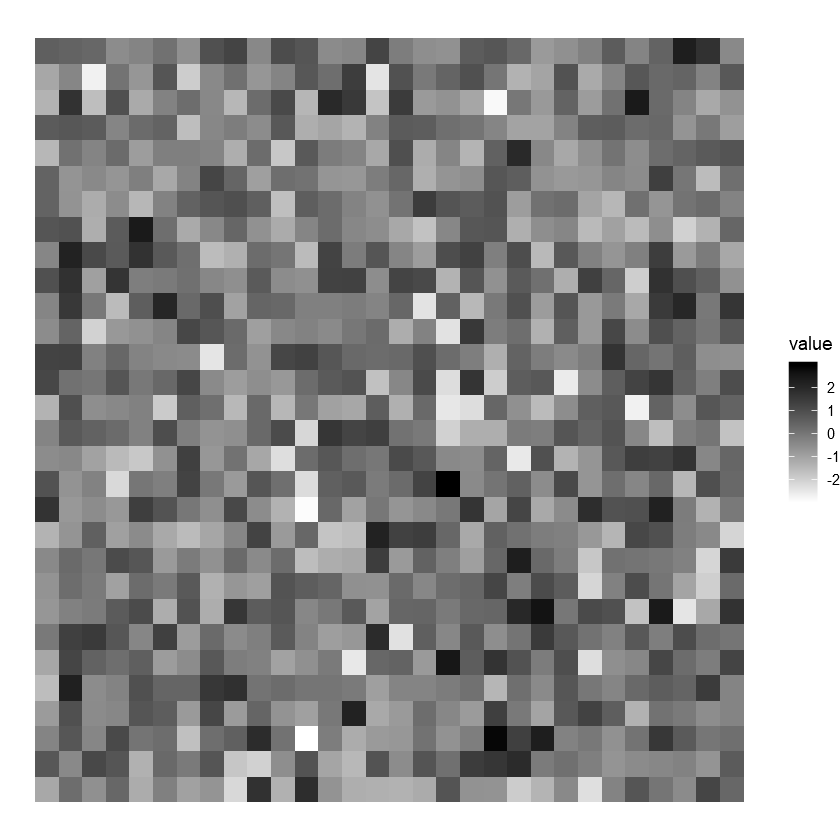

In [74]:
library(tidyverse)

m = matrix(rnorm(n=900),30,30)

dim(m)

m%>%reshape2::melt()%>% 
ggplot(aes(x=Var1, y=Var2, fill=value)) + 
geom_tile()+
scale_fill_gradient(low = "white", high = "black")+
theme_void()

Ta có thể dùng phổ màu bất kì, thí dụ viridis:

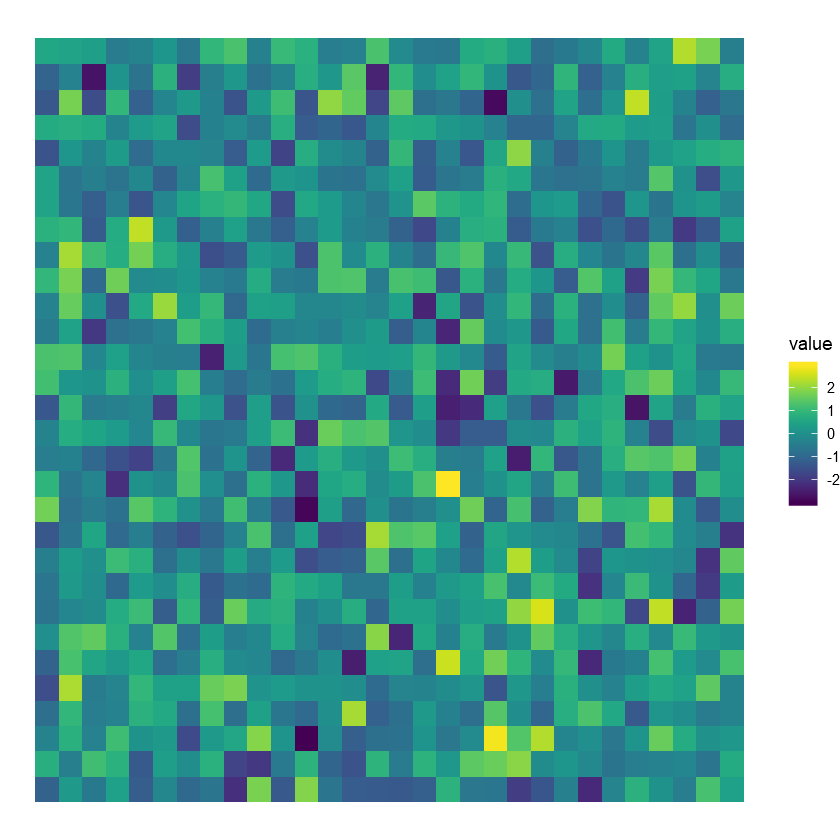

In [80]:
library('viridis')

m%>%reshape2::melt()%>% 
ggplot(aes(x=Var1, y=Var2, fill=value)) + 
geom_tile()+
scale_fill_viridis()+
theme_void()

Với một chút vọc phá trên matrix, ứng dụng cơ chế chọn mẫu ngẫu nhiên, ta có thể vẽ một bức tranh digital về những ngôi sao trong bầu trời đêm:

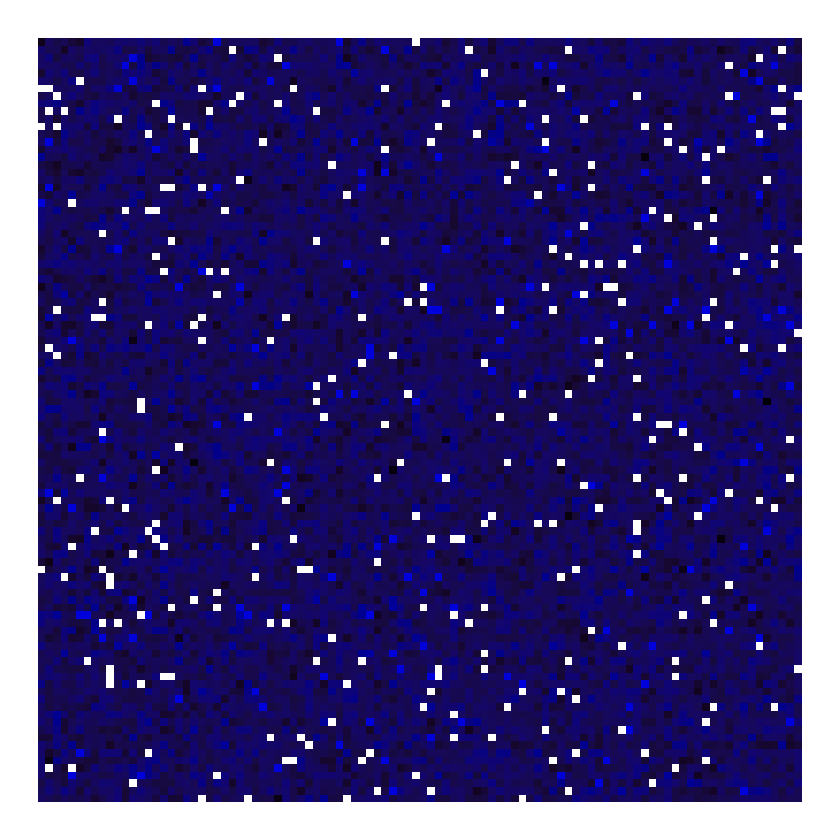

In [72]:
mat = matrix(rnorm(n=10000),100,100)

mat[sample(1:length(mat), 300, replace = FALSE)] <- NA
mat[sample(1:length(mat), 150, replace = FALSE)] <- 6

mat%>%reshape2::melt()%>%
ggplot(aes(x=Var1, y=Var2, fill=value)) + 
geom_tile(show.legend = F)+
scale_fill_gradient2(low = "black", mid = "darkblue", high = "blue", midpoint = 2, na.value = "white")+
theme_void()

Package imager cho phép tải một tấm ảnh (jpg, png) vào R, nếu ta chỉ trích riêng 1 kênh màu ta sẽ có 1 cấu trúc dữ liệu đơn giản hơn, chính là matrix, như trong thí dụ sau:

[1] 205 205

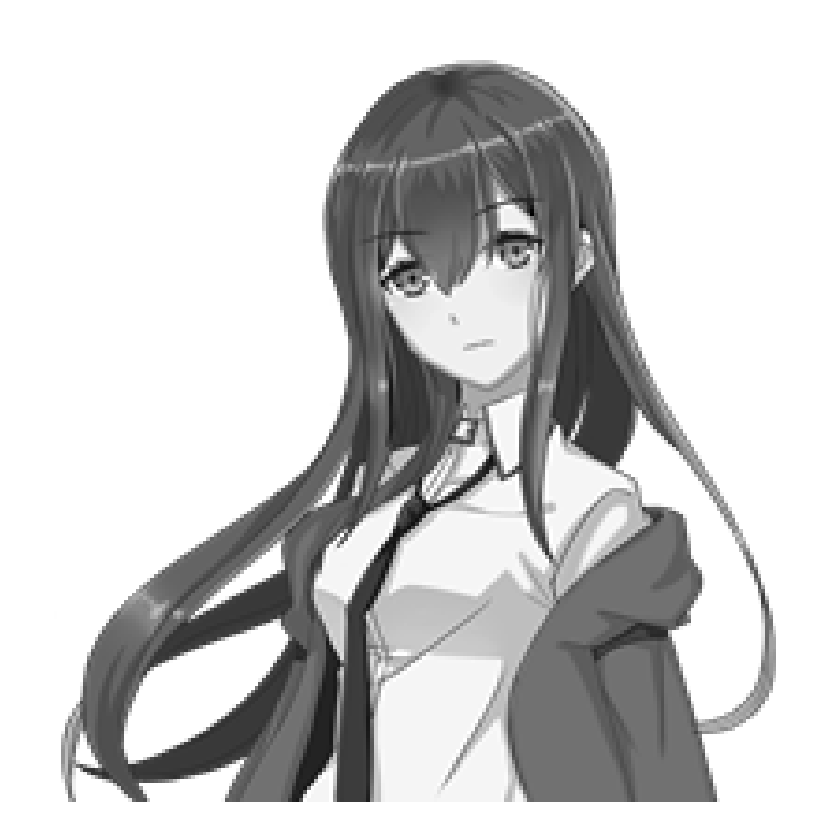

In [88]:
library(imager)

img = load.image('kurisu.png')

imat = img[,,,1]

dim(imat)

mat2 = reshape2::melt(imat)

mat2%>% ggplot(aes(x=(nrow(imat)+1-Var1), 
                   y=(nrow(imat)+1-Var2), 
                   fill=value)) + 
geom_tile(show.legend = F) + 
scale_fill_gradient(high = "white", low = "black") + 
theme_void() 

Ta có thể tạo một lớp nhiễu, với bản chất là matrix gồm toàn giá trị ngẫu nhiên, rồi chèn lớp nhiễu này vào tấm ảnh bằng phép cộng 2 matrices

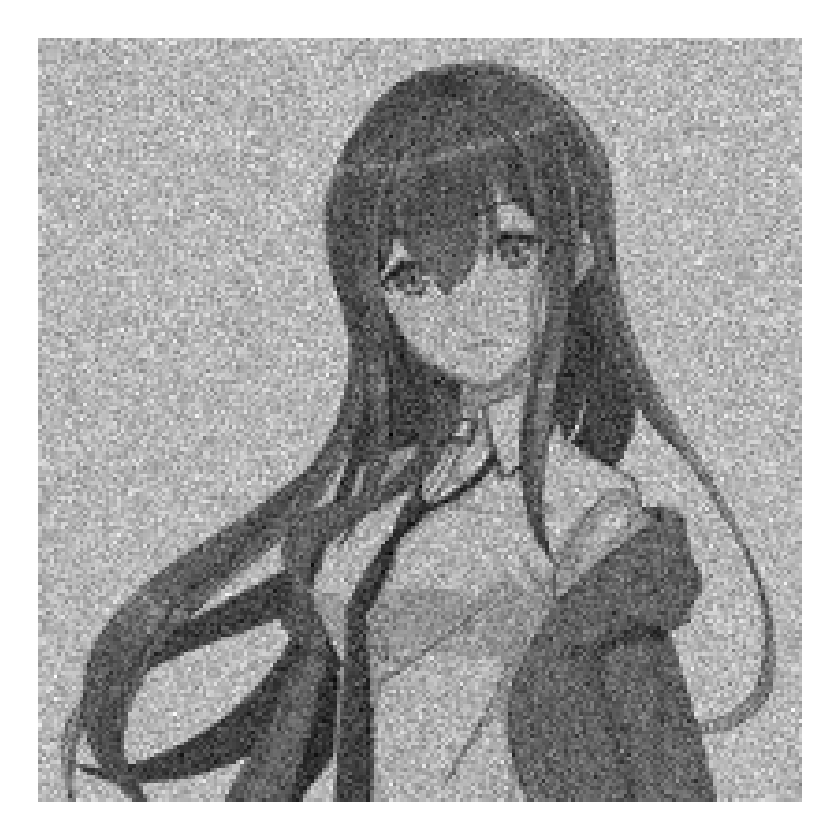

In [89]:
noise_mask = rnorm(n = 205*205, mean = 0, sd = 0.1) %>% matrix(data = ., 205,205)

imat_noise = imat + noise_mask

imat_noise= imat_noise/ max(imat_noise)

imat_noise%>%
reshape2::melt()%>% 
ggplot(aes(x=(206-Var1), y=(206-Var2), fill=value)) + 
geom_tile(show.legend = F) + 
scale_fill_gradient(high = "white", low = "black") + 
theme_void() 